In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [4]:
df['spam'] = df['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [5]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
from sklearn.model_selection import train_test_split


X = df['Message']
y=df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [7]:
df.shape

(5572, 3)

In [8]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4457,) (1115,)
(4457,) (1115,)


In [9]:
type(X_train)

pandas.core.series.Series

In [10]:
X_train[:4]

184                              He will, you guys close?
2171    CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER ...
5422              Ok k..sry i knw 2 siva..tats y i askd..
4113                            I'll see, but prolly yeah
Name: Message, dtype: object

In [11]:
type(y_train)

pandas.core.series.Series

In [12]:
y_train[:4]

184     0
2171    0
5422    0
4113    0
Name: spam, dtype: int64

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values) ### fit transform expects ndarray as input

In [14]:
X_train_cv

<4457x7663 sparse matrix of type '<class 'numpy.int64'>'
	with 58884 stored elements in Compressed Sparse Row format>

In [15]:
X_train_cv.shape

(4457, 7663)

In [16]:
### Spills out all the words from vocabulary it used to create the sparse vector
v.get_feature_names_out()   

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [17]:
v.get_feature_names_out().shape

(7663,)

In [18]:
v.get_feature_names_out()[1000:1050]

array(['antha', 'anthony', 'anti', 'antibiotic', 'any', 'anybody',
       'anymore', 'anyone', 'anyones', 'anythiing', 'anythin', 'anything',
       'anytime', 'anyway', 'anyways', 'anywhere', 'aom', 'apart',
       'apartment', 'apes', 'aphex', 'apnt', 'apo', 'apologetic',
       'apologise', 'apologize', 'app', 'apparently', 'appeal', 'appear',
       'appendix', 'applausestore', 'applebees', 'apples', 'apply',
       'applyed', 'appointment', 'appointments', 'appreciate',
       'appreciated', 'approaches', 'approaching', 'approve', 'approved',
       'approx', 'apps', 'appt', 'april', 'apt', 'aptitude'], dtype=object)

In [19]:
dir(v)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',

In [20]:
v.vocabulary_

{'he': 3368,
 'will': 7434,
 'you': 7624,
 'guys': 3285,
 'close': 1856,
 'can': 1641,
 'please': 5205,
 'come': 1914,
 'up': 7102,
 'now': 4807,
 'imin': 3624,
 'town': 6922,
 'dontmatter': 2415,
 'if': 3603,
 'urgoin': 7128,
 'outl8r': 4976,
 'just': 3868,
 'reallyneed': 5553,
 '2docd': 387,
 'dontplease': 2416,
 'dontignore': 2414,
 'mycalls': 4640,
 'no': 4765,
 'thecd': 6743,
 'isv': 3754,
 'important': 3632,
 'tome': 6876,
 '2moro': 400,
 'ok': 4884,
 'sry': 6371,
 'knw': 3957,
 'siva': 6143,
 'tats': 6643,
 'askd': 1100,
 'll': 4152,
 'see': 5928,
 'but': 1587,
 'prolly': 5398,
 'yeah': 7596,
 'swing': 6590,
 'by': 1602,
 'in': 3643,
 'bit': 1375,
 'got': 3204,
 'some': 6245,
 'things': 6770,
 'to': 6854,
 'take': 6616,
 'care': 1662,
 'of': 4859,
 'here': 3415,
 'firsg': 2882,
 'shall': 6006,
 'book': 1435,
 'chez': 1783,
 'jules': 3859,
 'for': 2946,
 'half': 3305,
 'eight': 2554,
 'that': 6734,
 'with': 7465,
 'thanks': 6728,
 'your': 7628,
 'message': 4439,
 'really': 5552,


In [22]:
v.get_feature_names_out()[3368]

'he'

In [23]:
X_train[:1]

184    He will, you guys close?
Name: Message, dtype: object

In [24]:
X_train[:1][184]

'He will, you guys close?'

In [30]:
X_train_cv_np = X_train_cv.toarray()

In [32]:
X_train_cv_np[:1]

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
np.where(X_train_cv_np[0]!=0)

(array([1856, 3285, 3368, 7434, 7624], dtype=int64),)

In [34]:
v.get_feature_names_out()[1856]

'close'

In [37]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()


model.fit(X_train_cv, y_train)

MultinomialNB()

In [39]:
### evaluate performance of model

### convert X_test to coutn Vectorization
X_test_cv = v.transform(X_test)

In [41]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

training score.... 0.9928202827013687
test score.... 0.9865470852017937
AUC ROC, area under the curve... 0.9553406422388039


C:\Users\sd991188\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


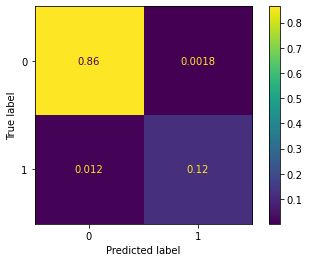

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_confusion_matrix

print(classification_report(y_test, y_pred,))
print('training score....', accuracy_score(y_train, model.predict(X_train_cv)))
print('test score....', accuracy_score(y_test, y_pred))
print('AUC ROC, area under the curve...', roc_auc_score(y_test,y_pred ))


plot_confusion_matrix(model, X_test_cv, y_test,normalize='all') 
plt.show()

# USING SKLearn pipelines

In [52]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb', MultinomialNB())
])

In [53]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [55]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

